In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

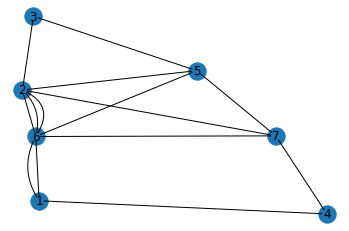

Number Of Nodes =  7
Number Of Edges =  14
Adgacency Matrix =
[[0 0 0 1 0 2 0]
 [0 0 1 0 1 3 1]
 [0 1 0 0 1 0 0]
 [1 0 0 0 0 0 1]
 [0 1 1 0 0 1 1]
 [2 3 0 0 1 0 1]
 [0 1 0 1 1 1 0]]


In [2]:
#Fig. 3a
Gra_1 = nx.MultiGraph()
Gra_1.add_nodes_from([1,2,3,4,5,6,7])

edgelist_1 = [
    (1,4),(1,6),(1,6),
    (2,3),(2,5),(2,6),(2,6),(2,6),(2,7),
    (3,5),
    (4,7),
    (5,6),(5,7),
    (6,7)
]
           
Gra_1.add_edges_from(edgelist_1)

p = nx.spring_layout(Gra_1) # layout for all nodes

nx.draw_networkx_nodes(Gra_1, p, node_size = 300)
nx.draw_networkx_labels(Gra_1, p)

# draw multi-edges
ax = plt.gca()
for e in Gra_1.edges:
    ax.annotate("",xy=p[e[0]], xycoords='data',xytext=p[e[1]], textcoords='data',arrowprops=dict(arrowstyle="-",shrinkA=5, shrinkB=5,patchA=None, patchB=None,connectionstyle="arc3, rad=rrr".replace('rrr',str(0.3*e[2])),), )

#draw self-loops
#nx.draw_networkx_edges(G, p, edgelist=edgelist2, arrowstyle="-|-")
plt.axis('off')
plt.savefig('NA-3A.png')
plt.show()
print("Number Of Nodes = ",Gra_1.number_of_nodes())
print("Number Of Edges = ",Gra_1.number_of_edges())
print("Adgacency Matrix =")
print(nx.adjacency_matrix(Gra_1).todense())

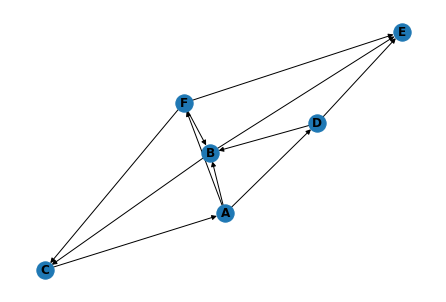

Number Of Nodes =  6
Number Of Edges =  11
Adgacency Matrix =
[[0 1 0 1 0 1]
 [0 0 1 0 1 0]
 [1 0 0 0 0 0]
 [0 1 0 0 1 0]
 [0 0 0 0 0 0]
 [0 1 1 0 1 0]]


In [3]:
#Fig. 3b
Gra_2 = nx.DiGraph()
Gra_2.add_nodes_from([1,2,3,4,5,6])

edgelist_2 = [
    (1,2),(1,4),(1,6),(2,3),(2,5),(3,1),(4,2),(4,5),(6,2),(6,3),(6,5)
]

label_dict = {
    1:"A",
    2:"B",
    3:"C",
    4:"D",
    5:"E",
    6:"F"
}
           
Gra_2.add_edges_from(edgelist_2)

#draw self-loops
nx.draw(Gra_2,labels=label_dict, with_labels=True, font_weight='bold')
plt.savefig('NA-3B.png')
plt.show()
print("Number Of Nodes = ",Gra_2.number_of_nodes())
print("Number Of Edges = ",Gra_2.number_of_edges())
print("Adgacency Matrix =")
print(nx.adjacency_matrix(Gra_2).todense())

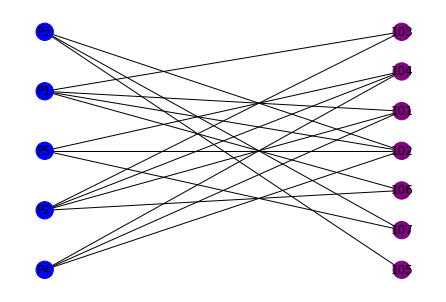

Incidence = 
[[1 1 1 0 0 1 0]
 [1 0 1 1 0 1 0]
 [0 1 0 0 1 0 1]
 [1 1 0 1 0 0 0]
 [0 1 0 1 0 0 1]]


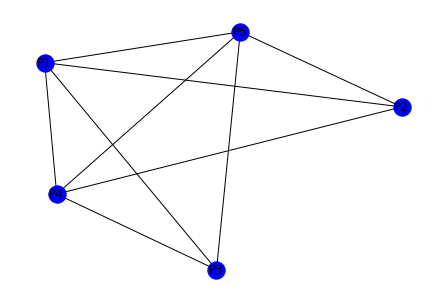

Node List = ['P1', 'P2', 'P3', 'P4', 'P5']
Edge List = [('P1', 'P2'), ('P1', 'P4'), ('P1', 'P5'), ('P1', 'P3'), ('P2', 'P4'), ('P2', 'P5'), ('P3', 'P4'), ('P3', 'P5'), ('P4', 'P5')]


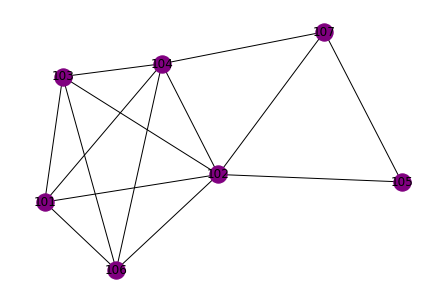

Node List = ['101', '102', '103', '104', '105', '106', '107']
Edge List = [('101', '104'), ('101', '102'), ('101', '106'), ('101', '103'), ('102', '105'), ('102', '107'), ('102', '106'), ('102', '104'), ('102', '103'), ('103', '106'), ('103', '104'), ('104', '107'), ('104', '106'), ('105', '107')]


In [4]:
#Fig. 4
Gra_3 = nx.Graph()

# Add nodes
nodelist_1 = ["P1", "P2","P3","P4","P5"]
nodelist_2 = ["101","102","103","104","105","106","107"]

#Add nodes from first group
Gra_3.add_nodes_from(nodelist_1, bipartite=0)

#Add nodes from second group
Gra_3.add_nodes_from(nodelist_2, bipartite=1)

#Add edges between nodes from two groups
edge_list_3 = [("P1","101"),("P1","102"),("P1","103"),("P1","106"),
            ("P2","101"),("P2","103"),("P2","104"),("P2","106"),
            ("P3","102"),("P3","105"),("P3","107"),
            ("P4","101"),("P4","102"),("P4","104"),
            ("P5","102"),("P5","104"),("P5","107"),
            ]
Gra_3.add_edges_from(edge_list_3)

top = nx.bipartite.sets(Gra_3)[0]
pos = nx.bipartite_layout(Gra_3, top)

nx.draw(Gra_3, pos=pos, with_labels=True, node_size=300,
       node_color=['blue','blue','blue','blue','blue','purple','purple','purple','purple','purple','purple','purple'])
plt.savefig('NA-4.png')
plt.show()
Incidence_m = bipartite.biadjacency_matrix(Gra_3, row_order=nodelist_1,column_order=nodelist_2)
print("Incidence = ")
print(Incidence_m.todense())

#Projecting Products to one mode
Gra_4 = bipartite.projected_graph(Gra_3, nodelist_1)
nx.draw(Gra_4, with_labels=True, node_size=300, node_color="blue")
plt.savefig('NA-4_A.png')
plt.show()
print("Node List =",(list(Gra_4.nodes())))
print("Edge List =",(list(Gra_4.edges())))

#Projecting Customers to one mode
Gra_5 = bipartite.projected_graph(Gra_3, nodelist_2)
nx.draw(Gra_5, with_labels=True, node_size=300, node_color="purple")
plt.savefig('NA-4_B.png')
plt.show()
print("Node List =",(list(Gra_5.nodes())))
print("Edge List =",(list(Gra_5.edges())))